In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pbdlib as pbd 
import os 

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read data from file

In [156]:
filename = os.path.dirname(pbd.__file__) + '/data/gui/' + 'test_conditioning_002.npy'
data = np.load(filename)[()]
x = np.concatenate(data['x'], axis=0)[::3]

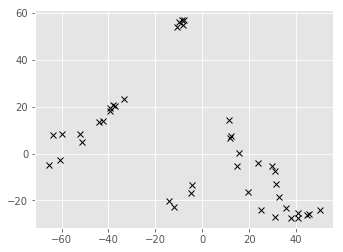

In [157]:
plt.plot(x[:, 0], x[:, 1], 'kx')
plt.axes().set_aspect('equal')

### Learning a joint distribution 

In [158]:
gmm = pbd.GMM(nb_dim=2, nb_states=6)
gmm.em(x, reg=0.1);

# based on sklearn.mixture.BayesianGaussianMixture
bgmm = pbd.VBayesianGMM({'n_components':15, 'n_init':5, 'reg_covar': 0.1 ** 2,
         'covariance_prior': 10. ** 2 * np.eye(2),'mean_precision_prior':1e-9})
bgmm.posterior(x);

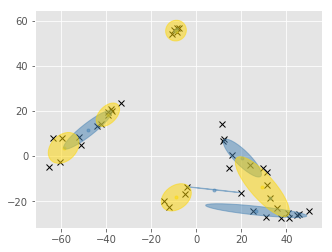

In [159]:
plt.plot(x[:, 0], x[:, 1], 'kx')
gmm.plot(color='steelblue')
bgmm.plot(color='gold')
plt.axes().set_aspect('equal')

In [160]:
x_in = np.linspace(-200, 200, 300)[:, None]
mu, sigma = gmm.condition(x_in, slice(0, 1), slice(1, 2))
bmu, bsigma = bgmm.condition(x_in, slice(0, 1), slice(1, 2))

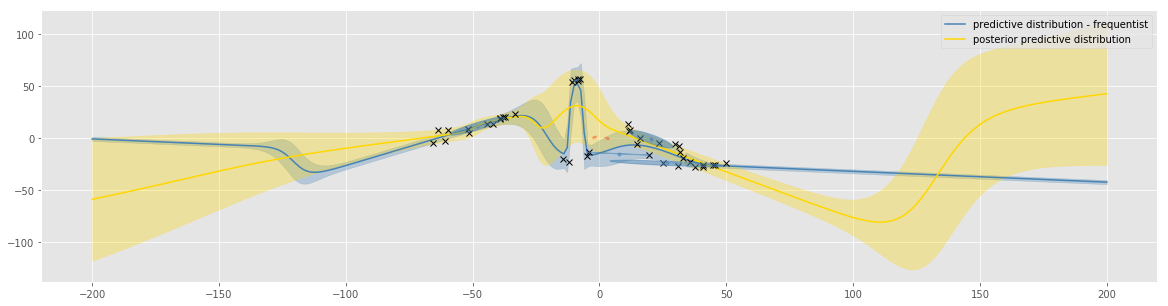

In [ ]:
plt.figure(figsize=(20, 5))
gmm.plot(color='steelblue')

plt.plot(x_in, mu, label='predictive distribution - frequentist', color='steelblue')

plt.fill_between(x_in[:, 0], 
                 mu[:, 0] - sigma[:, 0, 0]**0.5, 
                 mu[:, 0] + sigma[:, 0, 0]**0.5,
                 alpha=0.3, color='steelblue')

plt.fill_between(x_in[:, 0], 
                 bmu[:, 0] - bsigma[:, 0, 0]**0.5, 
                 bmu[:, 0] + bsigma[:, 0, 0]**0.5,
                 alpha=0.3, color='gold')

plt.plot(x_in, bmu, label='posterior predictive distribution', color='gold')

plt.plot(x[:, 0], x[:, 1], 'kx')

plt.legend()